# Sinc DVR check in 1D

In [1]:
# Directives on Jupyter
%reset
# Auto reload bootstrap.py
%load_ext autoreload
%autoreload 2


## Test on convergence for 1D Gaussian potential

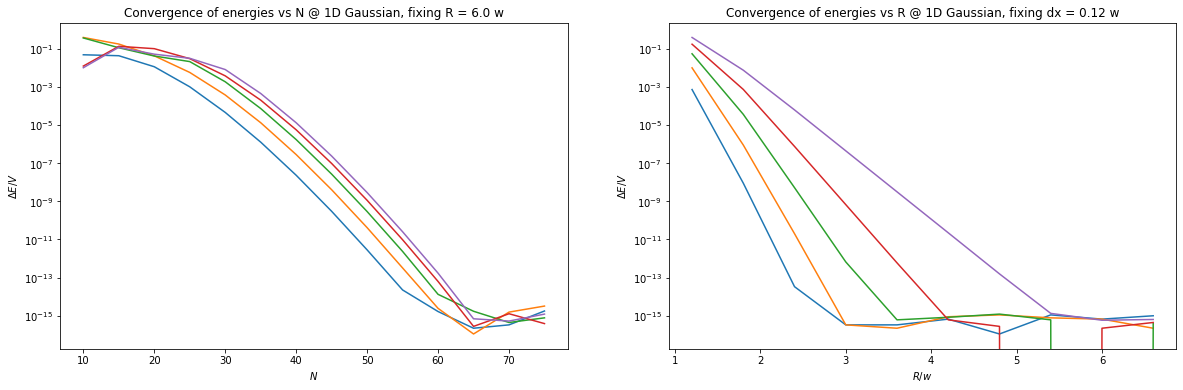

In [130]:
from DVR1d import *
import matplotlib.pyplot as plt
# np.set_printoptions(precision=4, suppress=True)

N, dE = N_convergence(range(k, 81, 5), R0)

f = plt.figure(figsize=(20, 6))
ax1 = f.add_subplot(1, 2, 1)
for i in range(k):
    ax1.semilogy(N[1:], abs(dE[:, i]))
ax1.set_xlabel('$N$')
ax1.set_ylabel('$\Delta E/V$')
ax1.set_title(
    'Convergence of energies vs N @ 1D Gaussian, fixing R = {} w'.format(R0/w))

R, dE = R_convergence(range(k, Nmax, 5), dx0)

ax2 = f.add_subplot(1, 2, 2)
for i in range(k):
    plt.semilogy(R[1:], abs(dE[:, i]))
ax2.set_xlabel('$R/w$')
ax2.set_ylabel('$\Delta E/V$')
ax2.set_title(
    'Convergence of energies vs R @ 1D Gaussian, fixing dx = {} w'.format(dx0/w))


## Test 1D simple harmonic oscillator potential

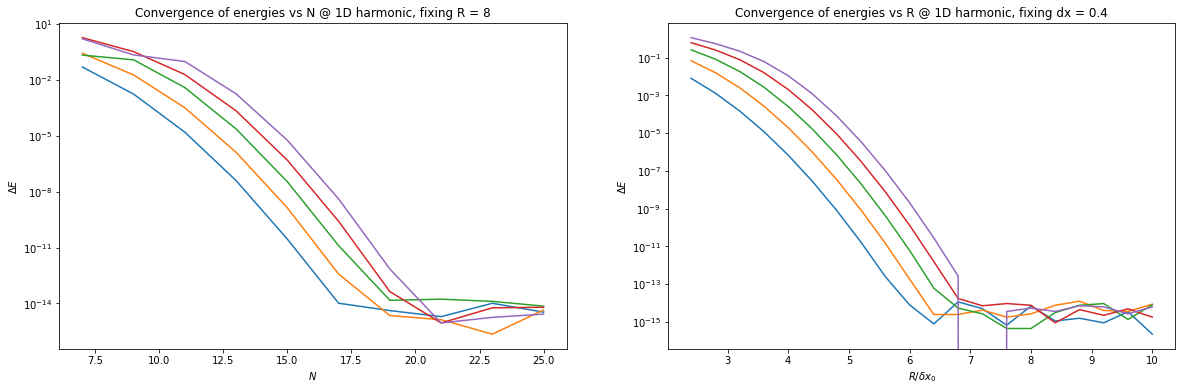

In [14]:
from DVR1d_sho import *
import matplotlib.pyplot as plt
# np.set_printoptions(precision=4, suppress=True)

N, dE, E1 = N_convergence(range(k, Nmax+1, 2), R0)

f = plt.figure(figsize=(20, 6))
ax1 = f.add_subplot(1, 2, 1)
for i in range(k):
    ax1.semilogy(N[1:], abs(dE[:, i]))
ax1.set_xlabel('$N$')
ax1.set_ylabel('$\Delta E$')
ax1.set_title(
    'Convergence of energies vs N @ 1D harmonic, fixing R = {}'.format(R0))

R, dE, E2 = R_convergence(range(k, Nmax+1), dx0)

ax2 = f.add_subplot(1, 2, 2)
for i in range(k):
    plt.semilogy(R[1:], abs(dE[:, i]))
ax2.set_xlabel('$R/\delta x_0$')
ax2.set_ylabel('$\Delta E$')
ax2.set_title(
    'Convergence of energies vs R @ 1D harmonic, fixing dx = {:.2g}'.format(dx0));


A suitable minimal grid choice is $R=8$, $N=20$.

For 3D, to achieve smaller grid point number, one might consider $R=6$, $N=15$.

For 1D, a safer choice is $R=10$, $N=30$.

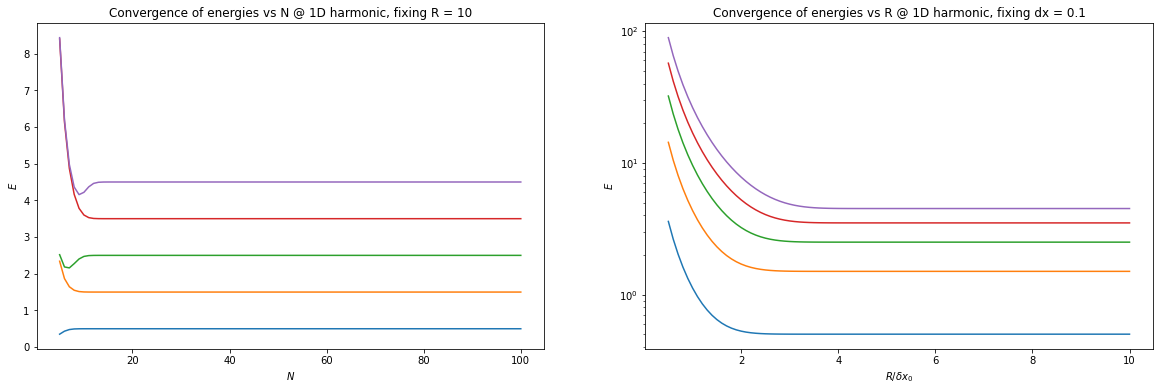

In [134]:
from DVR1d_sho import *
import matplotlib.pyplot as plt
# np.set_printoptions(precision=4, suppress=True)

N, dE, E1 = N_convergence(range(k, Nmax + 1), R0)

f = plt.figure(figsize=(20, 6))
ax1 = f.add_subplot(1, 2, 1)
for i in range(k):
    ax1.plot(N, abs(E1[:, i]))
ax1.set_xlabel('$N$')
ax1.set_ylabel('$E$')
ax1.set_title(
    'Convergence of energies vs N @ 1D harmonic, fixing R = {}'.format(R0))

R, dE, E2 = R_convergence(range(k, Nmax + 1), dx0)

ax2 = f.add_subplot(1, 2, 2)
for i in range(k):
    ax2.semilogy(R, abs(E2[:, i]))
ax2.set_xlabel('$R/\delta x_0$')
ax2.set_ylabel('$E$')
ax2.set_title(
    'Convergence of energies vs R @ 1D harmonic, fixing dx = {}'.format(dx0))


Plot basis sinc function:

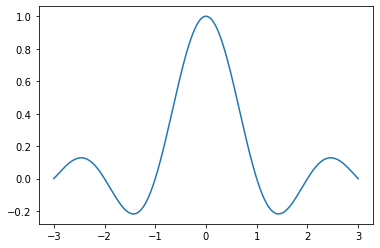

In [168]:
dx = 1
x = np.linspace(-3, 3, int(1000/dx))[None]
delta = 1/np.sqrt(dx) * np.sinc((x - 0*dx)/dx)
plt.plot(x.T, delta.T)


Plot wavefunctions solved by DVR 1D harmonic potential and compare with the exact solution:

[0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5]


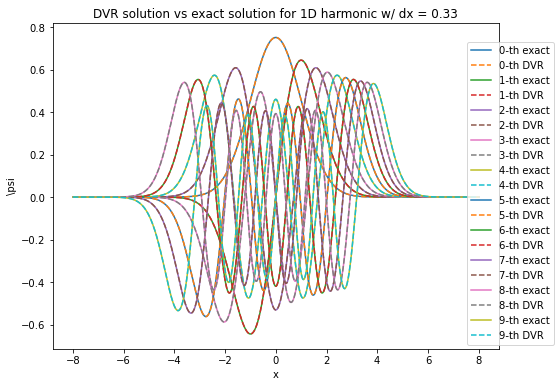

In [75]:
from DVR1d_sho import *
from scipy.special import *
import matplotlib.pyplot as plt
R = 10
n = 30
k = 10
dx = R/n
pltmax = 8
E, W = H_solver(n, dx)
print(E[:k])
x = np.linspace(-pltmax, pltmax, int(1000/dx))[None]
xn = np.arange(-n, n+1)[:, None] * dx
psi = 1/np.sqrt(dx) * np.sinc((x - xn)/dx).T @ W


def psi0(n, x):
    p = np.exp(-x**2/2) * eval_hermite(n, x)
    p *= 1/np.sqrt(2.**n * np.math.factorial(n))
    p *= 1/np.pi**(1/4)
    return p


f = plt.figure(figsize=(8, 6))
for i in range(0, k):
    plt.plot(x.T, psi0(i, x.T), label='{}-th exact'.format(i))
    plt.plot(x.T, np.sign(psi0(i, x[..., 0]) / psi[0, i])
             * psi[:, i], '--', label='{}-th DVR'.format(i))

plt.figlegend(loc='center right')
plt.xlabel('x')
plt.ylabel('\psi')
plt.title(
    'DVR solution vs exact solution for 1D harmonic w/ dx = {:.2f}'.format(dx));

The wavefunctions match perfectly well for even $R=10$, $\Delta x=1/3$ (in the unit of harmonic length).

**$\Delta x$ matching the length scale is important in the calculation!**

* If $\Delta x$ is too large, the energy might converge to inaccurate values.
* If $\Delta x$ is too small, the kinetic energy will be falsely too large.